In [1]:
# plots for presentation

import xarray
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import geopandas
import pandas
from shapely.geometry import Point
import os
import matplotlib.ticker as mticker
import matplotlib
import ulmo
from ulmo.plotting import plotting

/Users/rachelstumpf/ulmo/ulmo/utils/image_utils.py:8: UserWarning: healpy not installed.  Not all functions will work!
  warnings.warn("healpy not installed.  Not all functions will work!")


In [37]:
# june 30, 2020

jun30 = xarray.open_dataset("/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2020/182/20200630120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc")
jun30 = jun30['sea_surface_temperature']

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

jun30.plot(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='seismic', vmin = 270, vmax = 320)

ax.add_feature(cartopy.feature.LAND, facecolor = 'darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor = 'gray')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('06-30-2020 Daily Map')
#plt.show()

save_dir = os.path.expanduser('~/Downloads')
save_filename = os.path.join(save_dir, 'daily.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [4]:
# am

jun30am = xarray.open_dataset("/Users/rachelstumpf/Desktop/20200630120000-STAR-L3S_GHRSST-SSTsubskin-LEO_AM_D-ACSPO_V2.80-v02.0-fv01.0.nc")
jun30am = jun30am['sea_surface_temperature']

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

jun30am.plot(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='seismic', vmin = 270, vmax = 320)

ax.add_feature(cartopy.feature.LAND, facecolor = 'darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor = 'gray')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('06-30-2020 Daytime Map')
#plt.show()

save_dir = os.path.expanduser('~/Downloads')
save_filename = os.path.join(save_dir, 'am.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [8]:
# pm

jun30pm = xarray.open_dataset("/Users/rachelstumpf/Desktop/20200630120000-STAR-L3S_GHRSST-SSTsubskin-LEO_PM_N-ACSPO_V2.80-v02.0-fv01.0.nc")
jun30pm = jun30pm['sea_surface_temperature']

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

jun30pm.plot(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='seismic', vmin = 270, vmax = 320)

ax.add_feature(cartopy.feature.LAND, facecolor = 'darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor = 'gray')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('06-30-2020 Nighttime Map')
#plt.show()

save_dir = os.path.expanduser('~/Downloads')
save_filename = os.path.join(save_dir, 'pm.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [17]:
# make cutout 

centered_lat = -25.6
centered_lon = 12.21
pixel_num = 64

lats = jun30['lat'].values
lons = jun30['lon'].values

center_lat = np.abs(lats-centered_lat).argmin()
center_lon = np.abs(lons-centered_lon).argmin()

start_lat = center_lat - (pixel_num // 2)
end_lat = start_lat + pixel_num
start_lon = center_lon - (pixel_num // 2)
end_lon = start_lon + pixel_num

subarray = jun30.isel(lat = slice(start_lat,end_lat), lon = slice(start_lon,end_lon))

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

subarray.plot(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='seismic')

ax.add_feature(cartopy.feature.LAND, facecolor='gray')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('Subset Map')
#plt.show()

save_dir = os.path.expanduser('~/Downloads')
save_filename = os.path.join(save_dir, 'cutout.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

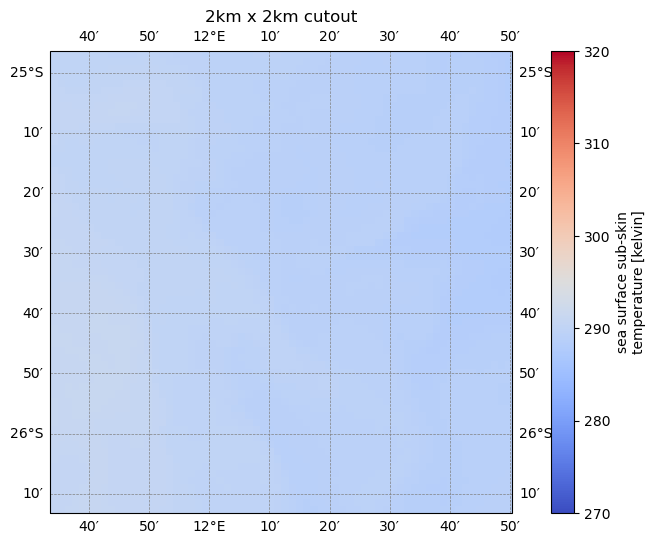

In [9]:
# make cutout with accurate colorscale 

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

subarray.plot(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='coolwarm',vmin = 270,vmax = 320)

ax.add_feature(cartopy.feature.LAND, facecolor='gray')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('Cutout')
plt.show()

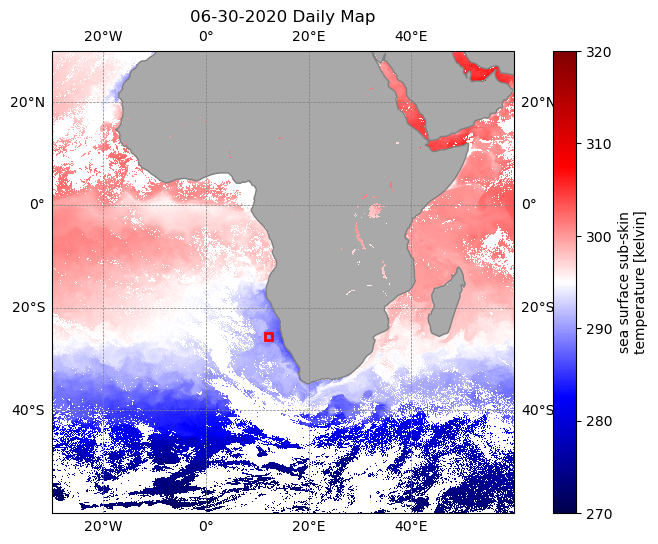

In [13]:
# show larger area of cutout 
subsect = jun30.sel(lat = slice(30,-60), lon = slice(-30,60))

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

subsect.plot(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='seismic',vmin = 270,vmax = 320)

ax.add_feature(cartopy.feature.LAND, facecolor = 'darkgray')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor = 'gray')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

rect = matplotlib.patches.Rectangle((11.57,-24.95), 12.83-11.57, -26.21+24.95, edgecolor = 'red', linewidth = 2, 
                                   fill = False, transform = cartopy.crs.PlateCarree())
ax.add_patch(rect)

plt.title('06-30-2020 Daily Map')
plt.show()

In [25]:
# map together 
lon_min,lon_max = 11.57, 12.83
lat_min, lat_max = -24.95, -26.21

fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 2, 1, projection=cartopy.crs.PlateCarree())
ax2 = plt.subplot(1, 2, 2, projection=cartopy.crs.PlateCarree())

subsect_plot = subsect.plot(ax=ax1, transform=cartopy.crs.PlateCarree(), cmap='seismic', vmin = 270,vmax = 320)

ax1.add_feature(cartopy.feature.LAND, facecolor = 'darkgray')
ax1.add_feature(cartopy.feature.COASTLINE, edgecolor = 'gray')

rect = matplotlib.patches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                          edgecolor='red', linewidth=2, fill=False, transform=cartopy.crs.PlateCarree())
ax1.add_patch(rect)

ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax1.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax1.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

subarray_plot = subarray.plot(ax=ax2, transform=cartopy.crs.PlateCarree(), cmap='seismic',vmin = 270,vmax = 320)

ax2.add_feature(cartopy.feature.LAND, facecolor = 'darkgray')
ax2.add_feature(cartopy.feature.COASTLINE, edgecolor = 'gray')

ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax2.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax2.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))


ax1.plot([lon_min, lon_min], [lat_min, lat_max], color='red', linewidth=2, transform=cartopy.crs.PlateCarree())
ax1.plot([lon_max, lon_max], [lat_min, lat_max], color='red', linewidth=2, transform=cartopy.crs.PlateCarree())
ax1.plot([lon_min, lon_max], [lat_min, lat_min], color='red', linewidth=2, transform=cartopy.crs.PlateCarree())
ax1.plot([lon_min, lon_max], [lat_max, lat_max], color='red', linewidth=2, transform=cartopy.crs.PlateCarree())

ax1.set_title('06-30-2020 Daily Map')
ax2.set_title('Subset Map')

#plt.show()

save_dir = os.path.expanduser('~/Downloads')
save_filename = os.path.join(save_dir, 'subset.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

In [24]:
# plots subsets next to each other 

am_subsect = jun30am.sel(lat = slice(50,20), lon = slice(-80,-50))
pm_subsect = jun30pm.sel(lat = slice(50,20), lon = slice(-80,-50))
daily_subsect = jun30.sel(lat = slice(50,20), lon = slice(-80,-50))

fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': cartopy.crs.PlateCarree()})

am_subsect_plot = am_subsect.plot(ax=axes[0], transform=cartopy.crs.PlateCarree(), cmap='seismic',vmin = 290,vmax = 305)

axes[0].add_feature(cartopy.feature.LAND, facecolor='darkgray')
axes[0].add_feature(cartopy.feature.COASTLINE, edgecolor='gray')

axes[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
axes[0].xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
axes[0].yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

pm_subsect_plot = pm_subsect.plot(ax=axes[1], transform=cartopy.crs.PlateCarree(), cmap='seismic',vmin = 290,vmax = 305)

axes[1].add_feature(cartopy.feature.LAND, facecolor='darkgray')
axes[1].add_feature(cartopy.feature.COASTLINE, edgecolor='gray')

axes[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
axes[1].xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
axes[1].yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

daily_subsect_plot = daily_subsect.plot(ax=axes[2], transform=cartopy.crs.PlateCarree(), cmap='seismic',vmin = 290,vmax = 305)

axes[2].add_feature(cartopy.feature.LAND, facecolor='darkgray')
axes[2].add_feature(cartopy.feature.COASTLINE, edgecolor='gray')

axes[2].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
axes[2].xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
axes[2].yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

am_subsect_plot.colorbar.remove()
pm_subsect_plot.colorbar.remove()
daily_subsect_plot.colorbar.remove()

plt.subplots_adjust(wspace=0.3)
axes[0].set_title('06-30-2020 Daytime')
axes[1].set_title('06-30-2020 Nighttime')
axes[2].set_title('06-30-2020 Daily')

cbar = plt.colorbar(am_subsect_plot, ax=axes, orientation='horizontal', pad=0.05, aspect=40)
cbar.set_label('sea surface temperature [kelvin]')

#plt.show()

save_dir = os.path.expanduser('~/Downloads')
save_filename = os.path.join(save_dir, 'combine.png')

plt.savefig(save_filename, dpi=300, bbox_inches='tight')
plt.close(fig)

<Axes: >

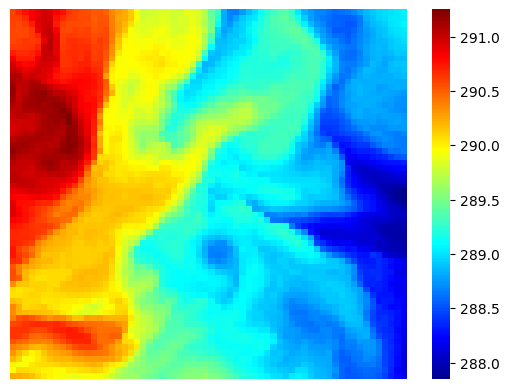

In [13]:
# subarray.data shows as numpy array
# using plotting function from ulmo, this should look similar to VIIRS cut out, rotated

plotting.show_image(subarray.data[0,...])